# Limits
You can use algebraic methods to calculate the rate of change over a function interval by joining two points on the function with a secant line and measuring its slope. For example, a function might return the distance traveled by a cyclist in a period of time, and you can use a secant line to measure the average velocity between two points in time. However, this doesn't tell you the cyclist's velocity at any single point in time - just the average speed over an interval.

To find the cyclist's velocity at a specific point in time, you need the ability to find the slope of a curve at a given point. *Differential Calculus* enables us to do through the use of *derivatives*. We can use derivatives to find the slope at a specific *x* value by calculating a delta for *x<sub>1</sub>* and *x<sub>2</sub>* values that are infinitesimally close together - so you can think of it as measuring the slope of a tiny straight line that comprises part of the curve.

## Introduction to Limits
However, before we can jump straight into derivatives, we need to examine another aspect of differential calculus - the *limit* of a function; which helps us measure how a function's value changes as the *x<sub>2</sub>* value approaches *x<sub>1</sub>*

To better understand limits, let's take a closer look at our function, and note that although we graph the function as a line, it is in fact made up of individual points. Run the following cell to show the points that we've plotted for integer values of ***x*** - the line is created by interpolating the points in between:

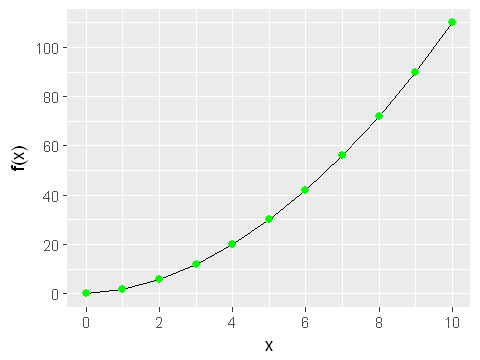

In [1]:
f = function(x){x^2 + x}
   
## Construct the data frame.
df = data.frame(x = seq(0,10))
df$y = f(df$x) ## Call g(x) with the vector df2$x

## Make the plot
library(ggplot2)
library(repr)
options(repr.plot.width=4, repr.plot.height=3)
ggplot(df, aes(x,y)) + geom_line() +
       geom_point(color = 'green', size = 2) +
       scale_x_continuous(breaks = seq(0,10,2)) +
       scale_y_continuous(breaks = seq(0,120,20)) +
       xlab('x') + ylab('f(x)')

We know from the function that the ***f(x)*** values are calculated by squaring the ***x*** value and adding ***x***, so we can easily calculate points in between and show them - run the following code to see this:

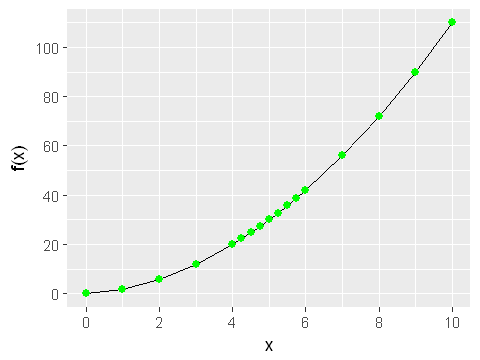

In [2]:
## Construct the data frame.
df2 = data.frame(x = c(seq(0,4), 4.25, 4.5, 4.75, 5, 5.25, 5.5, 5.75, seq(6,10)))
df2$y = f(df2$x) ## Call g(x) with the vector df2$x

## Make the plot
library(ggplot2)
library(repr)
options(repr.plot.width=4, repr.plot.height=3)
ggplot(df2, aes(x,y)) + geom_line() +
       geom_point(color = 'green', size = 2) +
       scale_x_continuous(breaks = seq(0,10,2)) +
       scale_y_continuous(breaks = seq(0,120,20)) +
       xlab('x') + ylab('f(x)')

Now we can see more clearly that this function line is formed of a continuous series of points, so theoretically for any given value of ***x*** there is a point on the line, and there is an adjacent point on either side with a value that is as close to ***x*** as possible, but not actually ***x***.

Run the following code to visualize a specific point for *x = 5*, and try to identify the closest point either side of it:

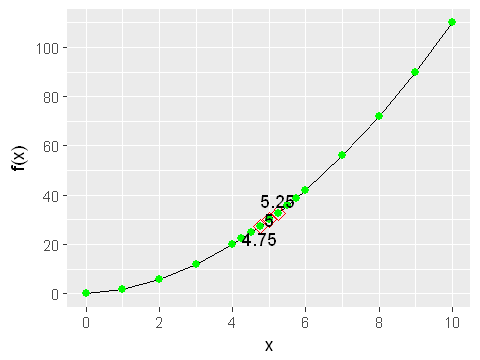

In [3]:
## Create a new data frame with the closest points
df3 = data.frame(x = c(4.75,5,5.25))
df3$y = f(df3$x)

## and another data frame with ofsets so numbers are legible 
df4 = df3
df4$y = c(df3[1,2] - 5, df3[2,2], df3[3,2] + 5)

## Make the plot
library(ggplot2)
library(repr)
options(repr.plot.width=4, repr.plot.height=3)
ggplot(df2, aes(x,y)) + geom_line() +
       geom_point(color = 'green', size = 2) +
       geom_point(data = df3, color = 'red', size = 2.5, shape = 5) +
       geom_text(data = df4, aes(label = round(df3$x,2))) +
       scale_x_continuous(breaks = seq(0,10,2)) +
       scale_y_continuous(breaks = seq(0,120,20)) +
       xlab('x') + ylab('f(x)')

You can see the point where ***x*** is 5, and you can see that there are points shown on the graph that appear to be right next to this point (at *x=4.75* and *x=5.25*). However, if we zoomed in we'd see that there are still gaps that could be filled by other values of ***x*** that are even closer to 5; for example, 4.9 and 5.1, or 4.999 and 5.001. If we could zoom infinitely close to the line we'd see that no matter how close a value you use (for example, 4.999999999999), there is always a value that's fractionally closer (for example, 4.9999999999999).

So what we can say is that there is a hypothetical number that's as close as possible to our desired value of *x* without actually being *x*, but we can't express it as a real number. Instead, we express its symbolically as a *limit*, like this:

\begin{equation}\lim_{x \to 5} f(x)\end{equation}

This is interpreted as *the limit of function f(x) as *x* approaches 5*.

##  Limits and Continuity
The function ***f(x)*** is *continuous* for all real numbered values of ***x***. Put simply, this means that you can draw the line created by the function without lifting your pen (we'll look at a more formal definition later in this course).

However, this isn't necessarily true of all functions. Consider function ***g(x)*** below: 

\begin{equation}g(x) = -(\frac{12}{2x})^{2}\end{equation}

This function is a little more complex than the previous one, but the key thing to note is that it requires a division by *2x*. Now, ask yourself; what would happen if you applied this function to an *x* value of **0**?

Well, 2 &bull; 2 is 0, and anything divided by 0 is *undefined*. So the *domain* of this function does not include 0; in other words, the function is defined when *x* is any real number such that *x is not equal to 0*. The function should therefore be written like this:

\begin{equation}g(x) = -(\frac{12}{2x})^{2},\;\; x \ne 0\end{equation}

So why is this important? Let's investigate by running the following R code to define the function and plot it for a set of arbitrary of values:

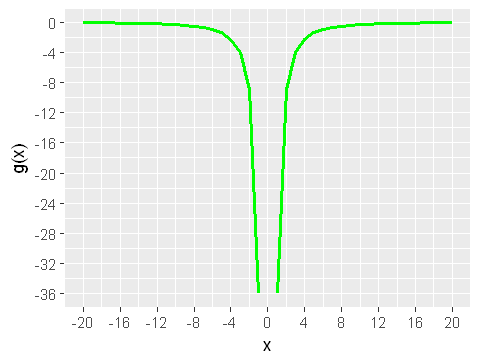

In [4]:
g = function(x){
    ## Use vectorized ifelse to return the value or the missing value, NA
    ifelse(x != 0,-(12/(2*x))**2, NA)
}

## Construct the data frame.
df5 = data.frame(x = seq(-20,20))
df5$y = g(df5$x) ## Call g(x) with the vector df2$x

## Make the plot
ggplot(df5, aes(x,y)) + geom_line(color = 'green', size = 1) +
       scale_x_continuous(breaks = seq(-20,20,4)) +
       scale_y_continuous(breaks = seq(-40,0,4)) +
       xlab('x') + ylab('g(x)')

Look closely at the plot, and note the gap the line where *x* = 0. This indicates that the function is not defined here.The *domain* of the function (it's set of possible input values) not include 0, and it's *range* (the set of possible output values) does not include a value for x=0.

This is a *non-continuous* function - in other words, it includes at least one gap when plotted (so you couldn't plot it by hand without lifting your pen). Specifically, the function is non-continuous at x=0.

By convention, when a non-continuous function is plotted, the points that form a continuous line (or *interval*) are shown as a line, and the end of each line where there is a discontinuity is shown as a circle, which is filled if the value at that point is included in the line and empty if the value is not included in the line.

In this case, the function produces two intervals with a gap between them where the function is not defined, so we can show the discontinuous point as an unfilled circle - run the following code to visualize this with R:

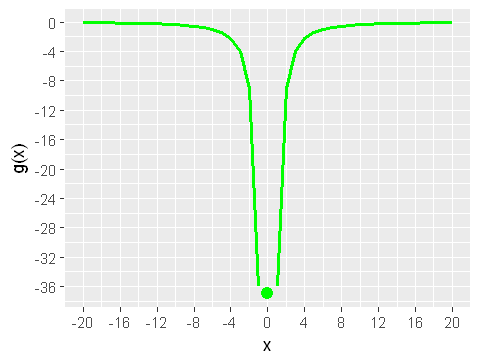

In [5]:
df6 = data.frame(x = 0, y = -37)

## Make the plot
ggplot(df5, aes(x,y)) + geom_line(color = 'green', size = 1) +
       geom_point(data = df6, aes(x,y), size = 3, color = 'green') +
       scale_x_continuous(breaks = seq(-20,20,4)) +
       scale_y_continuous(breaks = seq(-40,0,4)) +
       xlab('x') + ylab('g(x)')

There are a number of reasons a function might be non-continuous. For example, consider the following function:

\begin{equation}h(x) = 2\sqrt{x},\;\; x \ge 0\end{equation}

Applying this function to a non-negative ***x*** value returns a valid output; but for any value where ***x*** is negative, the output is undefined, because the square root of a negative value is not a real number.

Here's the R code to plot function ***h***:

Warning message in sqrt(x):
"NaNs produced"Scale for 'x' is already present. Adding another scale for 'x', which will
replace the existing scale.
Warning message:
"Removed 20 rows containing missing values (geom_path)."

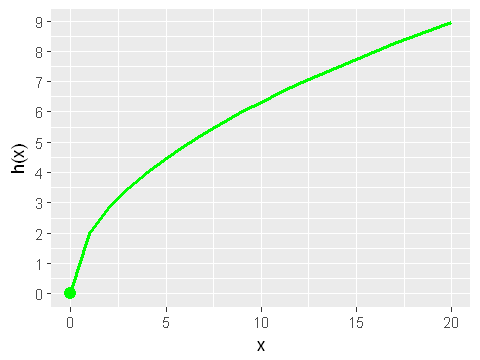

In [6]:
h = function(x){
    ## Use vectorized ifelse to return the value or the missing value, NA
    ifelse(x >= 0,2*sqrt(x), NA)
}

## Construct the data frame.
df7= data.frame(x = seq(-20,20))
df7$y = h(df7$x) ## Call g(x) with the vector df2$x

## data frame to plot terminal point
df8 = data.frame(x = 0, y = 0)

## Make the plot
ggplot(df7, aes(x,y)) + geom_line(color = 'green', size = 1) +
       geom_point(data = df8, aes(x,y), size = 3, color = 'green') +
       scale_x_continuous(breaks = seq(0,20,2)) +
       scale_y_continuous(breaks = seq(0,10)) +
       xlim(c(0,20)) +
       xlab('x') + ylab('h(x)')

Now, suppose we have a function like this:

\begin{equation}
k(x) = \begin{cases}
  x + 20, & \text{if } x \le 0, \\
  x - 100, & \text{otherwise }
\end{cases}
\end{equation}

In this case, the function's domain includes all real numbers, but its output is still non-continuous because of the way different values are returned depending on the value of *x*. The *range* of possible outputs for *k(x &le; 0)* is &le; 20, and the range of output values for *k(x > 0)* is x &ge; -100.

Let's use R to plot function ***k***:

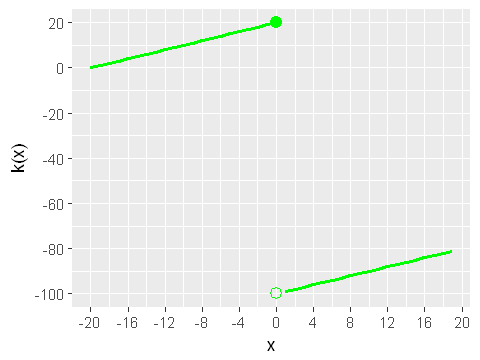

In [7]:
k= function(x){
    ## Use vectorized ifelse to return the value or the missing value, NA
    ifelse(x <= 0, x+20, x-100)
}

## Construct the data frame.
df9= data.frame(x = seq(-20,20))
df9$y = k(df9$x) ## Call g(x) with the vector df2$x

## data frame to plot terminal points
df10 = data.frame(x = 0, y = k(0))
df11 = data.frame(x=0.0001, y = k(0.0001))


## Make the plot
ggplot(df9[1:21,], aes(x,y)) + geom_line(color = 'green', size = 1) +
       geom_line(data = df9[22:40,], aes(x,y), color = 'green', size = 1) +
       geom_point(data = df10, aes(x,y), size = 3, color = 'green') +
       geom_point(data = df11, aes(x,y), size = 3, color = 'green', shape = 1) +
       scale_x_continuous(breaks = seq(-20,20,4)) +
       scale_y_continuous(breaks = seq(-100,20,20)) +
       xlab('x') + ylab('k(x)')


## Finding Limits of Functions Graphically
So the question arises, how do we find a value for the limit of a function at a specific point?

Let's explore this function, ***a***:

\begin{equation}a(x) = x^{2} + 1\end{equation}

We can start by plotting it:

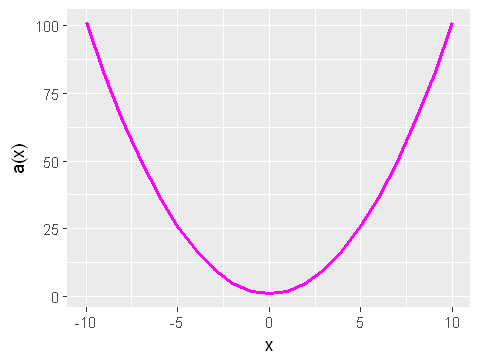

In [8]:
a = function(x){x^2 + 1}

## Construct the data frame.
df12 = data.frame(x = seq(-10,10))
df12$y = a(df12$x) ## Call g(x) with the vector df2$x

## Make the plot
ggplot(df12, aes(x,y)) + geom_line(color = 'magenta', size = 1) +
       xlab('x') + ylab('a(x)')

Note that this function is continuous at all points, there are no gaps in its range. However, the range of the function is *{a(x) &ge; 1}* (in other words, all real numbers that are greater than or equal to 1). For negative values of ***x***, the function appears to return ever-decreasing values as ***x*** gets closer to 0, and for positive values of ***x***, the function appears to return ever-increasing values as ***x*** gets further from 0; but it never returns 0.

Let's plot the function for an ***x*** value of 0 and find out what the ***a(0)*** value is returned:

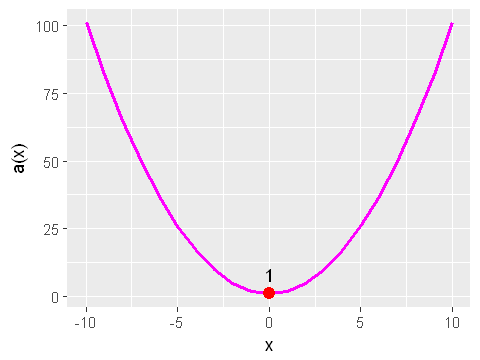

In [9]:
df13 = data.frame(x = 0, y = a(0))

## Make the plot
ggplot(df12, aes(x,y)) + geom_line(color = 'magenta', size = 1) +
       geom_point(data = df13, aes(x,y), size = 3, color = 'red')  +
       annotate("text", x = 0, y = 8, label = toString(df13$y)) +
       xlab('x') + ylab('a(x)')

OK, so ***a(0)*** returns **1**.

What happens if we use ***x*** values that are very slightly higher or lower than 0?

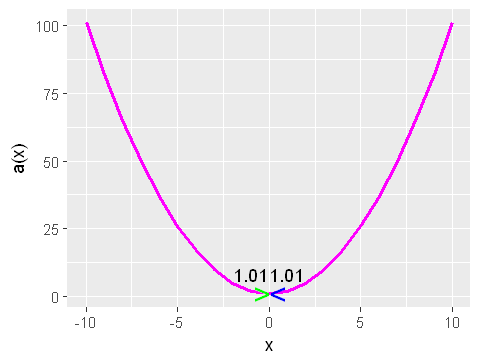

In [10]:
## Data frames for the marker position with x set for correct display of shape
df14 = data.frame(x = 0.5, y = a(0.1))
df15 = data.frame(x = -0.4, y = a(-0.1))

## Make the plot
ggplot(df12, aes(x,y)) + geom_line(color = 'magenta', size = 1) +
       geom_point(data = df14, aes(x,y), size = 6, color = 'blue', shape = '<')  +
       geom_point(data = df15, aes(x,y), size = 6, color = 'green', shape = '>')  +
       annotate("text", x = 1, y = 8, label = toString(df14$y)) +
       annotate("text", x = -1, y = 8, label = toString(df15$y)) +
       xlab('x') + ylab('a(x)')

These ***x*** values return ***a(x)*** values that are just slightly above 1, and if we were to keep plotting numbers that are increasingly close to 0, for example 0.0000000001 or -0.0000000001, the function would still return a value that is just slightly greater than 1. The limit of function *a(x)* as *x* approaches 0, is 1; and the notation to indicate this is:

\begin{equation}\lim_{x \to 0} a(x) = 1 \end{equation}

This reflects a more formal definition of function continuity. Previously, we stated that a function is continuous at a point if you can draw it at that point without lifting your pen. The more mathematical definition is that a function is continuous at a point if the limit of the function as it approaches that point from both directions is equal to the function's value at that point. In this case, as we approach x = 0 from both sides, the limit is 1; and the value of *a(0)* is also 1; so the function is continuous at x = 0.

### Limits at Non-Continuous Points
Let's try another function, which we'll call ***b***:

\begin{equation}b(x) = -2x^{2} \cdot \frac{1}{x},\;\;x\ne0\end{equation}

Note that this function has a domain that includes all real number values of *x* such that *x* does not equal 0. In other words, the function will return a valid output for any number other than 0.

Let's create it and plot it with R:

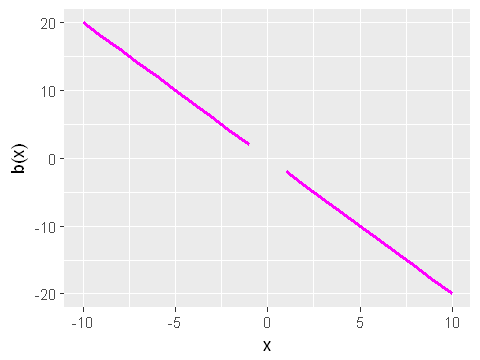

In [11]:
b = function(x){
    ## Use ifelse to vectorize the if statement
    ifelse(x != 0, (-2*x**2)/x, NA)
}

## Construct the data frame.
df16 = data.frame(x = seq(-10,10))
df16$y = b(df16$x) ## Call g(x) with the vector df2$x

## Make the plot
ggplot(df16, aes(x,y)) + geom_line(color = 'magenta', size = 1) +
       xlab('x') + ylab('b(x)')

The output from this function contains a gap in the line where x = 0. It seems that not only does the *domain* of the function (the values that can be passed in as *x*) exclude 0; but the *range* of the function (the set of values that can be returned from it) also excludes 0.

We can't evaluate the function for an *x* value of 0, but we can see what it returns for a value that is just very slightly less than 0:

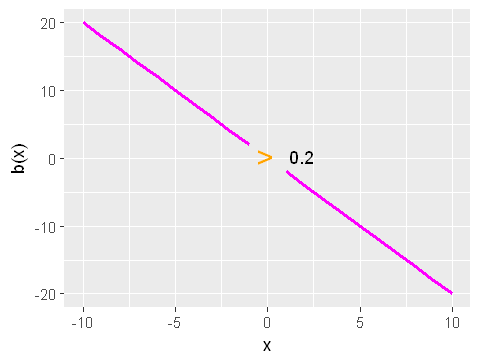

In [12]:
## Data frame for marker
df17 = data.frame(x = -0.1, y = b(-0.1))

## Make the plot
ggplot(df16, aes(x,y)) + geom_line(color = 'magenta', size = 1) +
       geom_point(data = df17, aes(x,y), size = 6, color = 'orange', shape = '>')  +
       annotate("text", x = df17$x + 2, y = df17$y, label = toString(df17$y)) + 
       xlab('x') + ylab('b(x)')

We can even try a negative *x* value that's a little closer to 0.

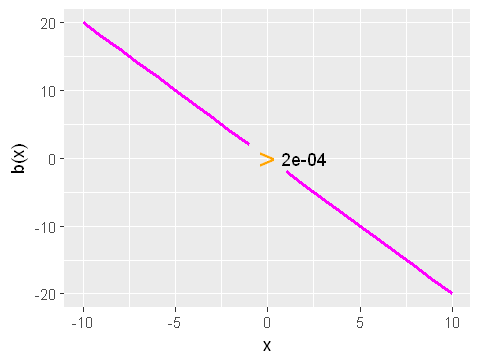

In [13]:
## Data frame for marker
df18 = data.frame(x = -0.0001, y = b(-0.0001))

## Make the plot
ggplot(df16, aes(x,y)) + geom_line(color = 'magenta', size = 1)  +
       geom_point(data = df18, aes(x,y), size = 6, color = 'orange', shape = '>')  +
       annotate("text", x = df18$x + 2, y = df18$y, label = toString(df18$y)) + 
       xlab('x') + ylab('b(x)')

So as the value of *x* gets closer to 0 from the left (negative), the value of *b(x)* is decreasing towards 0. We can show this with the following notation:

\begin{equation}\lim_{x \to 0^{-}} b(x) = 0 \end{equation}

Note that the arrow points to 0<sup>-</sup> (with a minus sign) to indicate that we're describing the limit as we approach 0 from the negative side.

So what about the positive side?

Let's see what the function value is when *x* is 0.1:

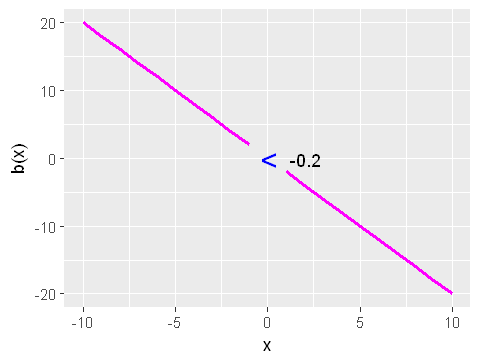

In [14]:
## Data frame for marker
df19 = data.frame(x = 0.1, y = b(0.1))

## Make the plot
ggplot(df16, aes(x,y)) + geom_line(color = 'magenta', size = 1)  +
       geom_point(data = df19, aes(x,y), size = 6, color = 'blue', shape = '<')  +
       annotate("text", x = df19$x + 2, y = df19$y, label = toString(df19$y)) + 
       xlab('x') + ylab('b(x)')

What happens if we decrease the value of *x* so that it's even closer to 0?

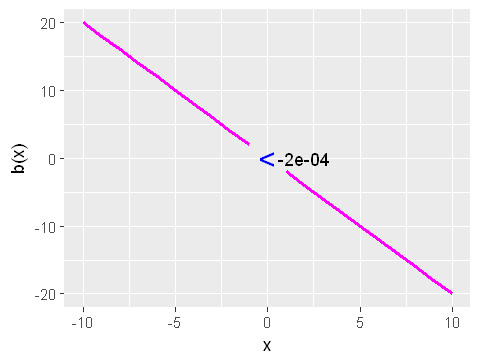

In [15]:
## Data frame for marker
df18 = data.frame(x = 0.0001, y = b(0.0001))

## Make the plot
ggplot(df16, aes(x,y)) + geom_line(color = 'magenta', size = 1)  +
       geom_point(data = df18, aes(x,y), size = 6, color = 'blue', shape = '<')  +
       annotate("text", x = df18$x + 2, y = df18$y, label = toString(df18$y)) + 
       xlab('x') + ylab('b(x)')

As with the negative side, as *x* approaches 0 from the positive side, the value of *b(x)* gets closer to 0; and we can show that like this:

\begin{equation}\lim_{x \to 0^{+}} b(x) = 0 \end{equation}

Now, even although the function is not defined at x = 0; since the limit as we approach x = 0 from the negative side is 0, and the limit when we approach x = 0 from the positive side is also 0; we can say that the overall, or *two-sided* limit for the function at x = 0 is 0:

\begin{equation}\lim_{x \to 0} b(x) = 0 \end{equation}

So can we therefore just ignore the gap and say that the function is *continuous* at x = 0? Well, recall that the formal definition for continuity is that to be continuous at a point, the function's limit as we approach the point in both directions must be equal to the function's value at that point. In this case, the two-sided limit as we approach x = 0 is 0, but *b(0)* is not defined; so the function is ***non-continuous*** at x = 0.

### One-Sided Limits
Let's take a look at a different function. We'll call this one ***c***:

\begin{equation}
c(x) = \begin{cases}
  x + 20, & \text{if } x \le 0, \\
  x - 100, & \text{otherwise }
\end{cases}
\end{equation}

In this case, the function's domain includes all real numbers, but its range is still non-continuous because of the way different values are returned depending on the value of *x*. The range of possible outputs for *c(x &le; 0)* is &le; 20, and the range of output values for *c(x > 0)* is x &ge; -100.

Let's use R to plot function ***c*** with some values for *c(x)* marked on the line

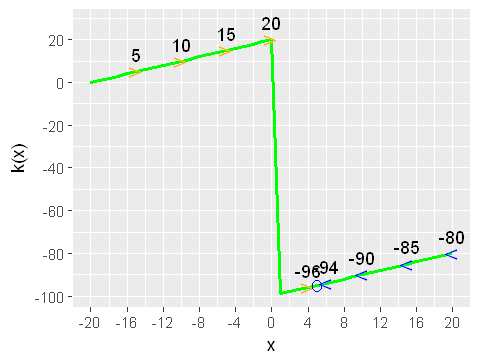

In [16]:
k= function(x){
    ## Use vectorized ifelse to return the value or the missing value, NA
    ifelse(x <= 0, x+20, x-100)
}

## Construct the data frame.
df19= data.frame(x = seq(-20,20))
df19$y = k(df19$x) ## Call g(x) with the vector df2$x

## data frames to marker points
df20 = data.frame(x = c(-15, -10, -5, 0, 4, 6, 10, 15, 20))
df20$y = k(df20$x)
df21 = data.frame(x = 5, y = k(5))

## Make the plot
ggplot(df19, aes(x,y)) + geom_line(color = 'green', size = 1) +
       geom_point(data = df20[1:5,], aes(x,y), size = 5, color = 'orange', shape = '>') +
       geom_point(data = df20[6:9,], aes(x,y), size = 5, color = 'blue', shape = '<') +
       geom_point(data = df21, aes(x,y), size = 3, color = 'blue', shape = 'O') +
       annotate("text", x = df20$x, y = df20$y + 8, label = df20$y) + 
       scale_x_continuous(breaks = seq(-20,20,4)) +
       scale_y_continuous(breaks = seq(-100,20,20)) +
       xlab('x') + ylab('k(x)')

The plot of the function shows a line in which the *c(x)* value increases towards 25 as *x* approaches 5 from the negative side:

\begin{equation}\lim_{x \to 5^{-}} c(x) = 25 \end{equation}

However, the *c(x)* value decreases towards -95 as *x* approaches 5 from the positive side:

\begin{equation}\lim_{x \to 5^{+}} c(x) = -95 \end{equation}

So what can we say about the two-sided limit of this function at x = 5?

The limit as we approach x = 5 from the negative side is *not* equal to the limit as we approach x = 5 from the positive side, so no two-sided limit exists for this function at that point:

\begin{equation}\lim_{x \to 5} \text{does not exist} \end{equation}

### Asymptotes and Infinity
OK, time to look at another function:

\begin{equation}d(x) = \frac{4}{x - 25},\;\; x \ne 25\end{equation}

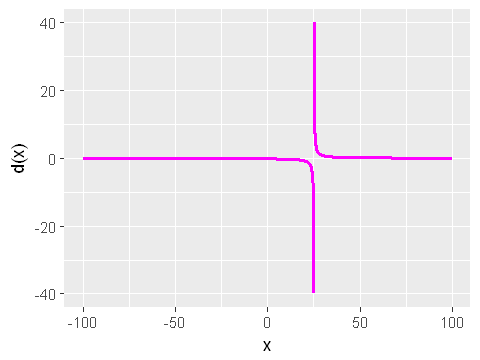

In [17]:
## Function to compute d
d = function(x){
    return(ifelse(x != 25, 4/(x-25), NULL))
}

## Compute the x and y values above and below the sigularity
df20 = data.frame(x = seq(-100,24.9,by=0.1))
df20$d = d(df20$x)
df21 = data.frame(x = seq(25.1,100,by=0.1))
df21$d = d(df21$x)

## plot the function
ggplot() + 
   geom_line(data = df20, aes(x, d), color = 'magenta', size = 1) +
   geom_line(data = df21, aes(x, d), color = 'magenta', size = 1)  +
   xlab('x') + ylab('d(x)')

What's the limit of *d* as *x* approaches 25?

We can plot a few annotations to help us:

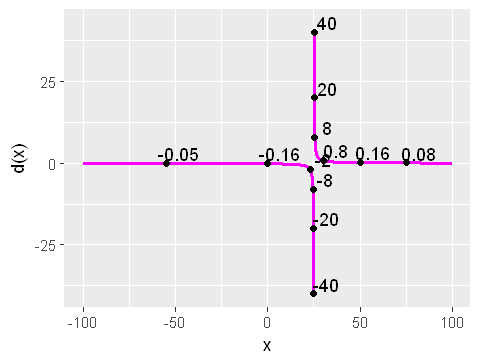

In [18]:
## Data frame for the annotations
df22 = data.frame(x = c(-55, 0, 23, 24.5, 24.8, 24.9, 25.1, 25.2, 25.5, 30, 50, 75))
df22$d = d(df22$x)

## plot the function with annotaton
ggplot() + 
   geom_line(data = df20, aes(x, d), color = 'magenta', size = 1) +
   geom_line(data = df21, aes(x, d), color = 'magenta', size = 1) +
   geom_point(data = df22, aes(x,d)) +
   annotate("text", x = df22$x + 7, y = df22$d + 3, label = round(df22$d,8)) +
       xlab('x') + ylab('d(x)')

From these plotted values, we can see that as *x* approaches 25 from the negative side, *d(x)* is decreasing, and as *x* approaches 25 from the positive side, *d(x)* is increasing. As *x* gets closer to 25, *d(x)* increases or decreases more significantly.

If we were to plot every fractional value of *d(x)* for *x* values between 24.9 and 25, we'd see a line that decreases indefinitely, getting closer and closer to the x = 25 vertical line, but never actually reaching it. Similarly, plotting every *x* value between 25 and 25.1 would result in a line going up indefinitely, but always staying to the right of the vertical x = 25 line.

The x = 25 line in this case is an *asymptote* - a line to which a curve moves ever closer but never actually reaches. The positive limit for x = 25 in this case in not a real numbered value, but *infinity*:

\begin{equation}\lim_{x \to 25^{+}} d(x) = \infty \end{equation}

Conversely, the negative limit for x = 25 is negative infinity:

\begin{equation}\lim_{x \to 25^{-}} d(x) = -\infty \end{equation}



## Finding Limits Numerically Using a Table
Up to now, we've estimated limits for a point graphically by examining a graph of a function. You can also approximate limits by creating a table of x values and the corresponding function values either side of the point for which you want to find the limits.

For example, let's return to our ***a*** function:

\begin{equation}a(x) = x^{2} + 1\end{equation}

If we want to find the limits as x is approaching 0, we can apply the function to some values either side of 0 and view them as a table. Here's some R code to do that:

In [19]:
## Function a(x)
a = function(x) x^2 + 1

## Create the data frame
df23 = data.frame(x = c(-1, -0.5, -0.2, -0.1, -0.01, 0, 0.01, 0.1, 0.2, 0.5, 1))
df23[,'a(x)'] = a(df23$x)
df23

x,a(x)
-1.00,2.0000
-0.50,1.2500
-0.20,1.0400
-0.10,1.0100
-0.01,1.0001
0.00,1.0000
0.01,1.0001
0.10,1.0100
0.20,1.0400
0.50,1.2500


Looking at the output, you can see that the function values are getting closer to 1 as x approaches 0 from both sides, so:

\begin{equation}\lim_{x \to 0} a(x) = 1 \end{equation}

Additionally, you can see that the actual value of the function when x = 0 is also 1, so:

\begin{equation}\lim_{x \to 0} a(x) = a(0) \end{equation}

Which according to our earlier definition, means that the function is continuous at 0.

However, you should be careful not to assume that the limit when x is approaching 0 will always be the same as the value when x = 0; even when the function is defined for x = 0.

For example, consider the following function:

\begin{equation}
e(x) = \begin{cases}
  x = 5, & \text{if } x = 0, \\
  x = 1 + x^{2}, & \text{otherwise }
\end{cases}
\end{equation}

Let's see what the function returns for *x* values either side of 0 in a table:

In [20]:
## Function e(x)
e = function(x){
    ifelse(x == 0, 5, 1 + x^2) 
}

## Create the data frame
df24 = data.frame(x = c(-1, -0.5, -0.2, -0.1, -0.01, 0, 0.01, 0.1, 0.2, 0.5, 1))
df24[,'e(x)'] = e(df24$x)
df24

x,e(x)
-1.00,2.0000
-0.50,1.2500
-0.20,1.0400
-0.10,1.0100
-0.01,1.0001
0.00,5.0000
0.01,1.0001
0.10,1.0100
0.20,1.0400
0.50,1.2500


As before, you can see that as the *x* values approach 0 from both sides, the value of the function gets closer to 1, so:

\begin{equation}\lim_{x \to 0} e(x) = 1 \end{equation}

However the actual value of the function when x = 0 is 5, not 1; so:

\begin{equation}\lim_{x \to 0} e(x) \ne e(0) \end{equation}

Which according to our earlier definition, means that the function is non-continuous at 0.

Run the following cell to see what this looks like as a graph:

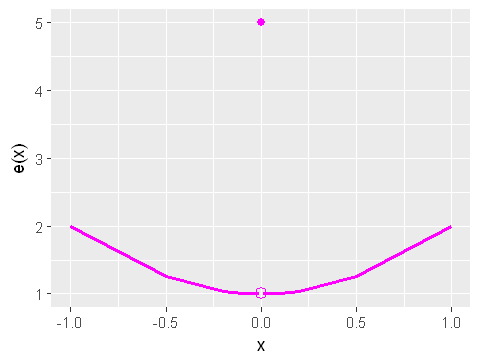

In [21]:
ggplot() +
  geom_line(data = df24[df24$x < 0,], aes(x,e(x)), color = 'magenta', size = 1) + 
  geom_line(data = df24[df24$x > 0,], aes(x,e(x)), color = 'magenta', size = 1) +
  geom_point(data = df24[df24$x == 0,], aes(x,e(x)), color = 'magenta', size = 2) +
  geom_point(data = data.frame(x = 0, y = 1), aes(x,y), size = 3, color = 'magenta', shape = 1)

## Determining Limits Analytically
We've seen how to estimate limits visually on a graph, and by creating a table of *x* and *f(x)* values either side of a point. There are also some mathematical techniques we can use to calculate limits.

### Direct Substitution
Recall that our definition for a function to be continuous at a point is that the two-directional limit must exist and that it must be equal to the function value at that point. It therefore follows, that if we know that a function is continuous at a given point, we can determine the limit simply by evaluating the function for that point.

For example, let's consider the following function ***g***:

\begin{equation}g(x) = \frac{x^{2} - 1}{x - 1}, x \ne 1\end{equation}

Run the following code to see this function as a graph:

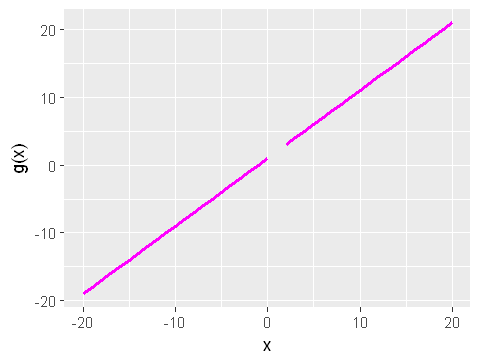

In [22]:
g = function(x){
    ## Use ifelse to vectorize the if statement
    ifelse(x != 1, (x^2 - 1)/(x - 1), NA)
}

## Construct the data frame.
df25 = data.frame(x = seq(-20,20))
df25$g = g(df25$x) ## Call g(x) with the vector df25$x

## Make the plot
ggplot(df25, aes(x,g)) + geom_line(color = 'magenta', size = 1) +
       xlab('x') + ylab('g(x)')

Now, suppose we need to find the limit of ***g(x)*** as ***x*** approaches **4**. We can try to find this by simply substituting 4 for the *x* values in the function:

\begin{equation}g(4) = \frac{4^{2} - 1}{4 - 1}\end{equation}

This simplifies to:

\begin{equation}g(4) = \frac{15}{3}\end{equation}

So:

\begin{equation}\lim_{x \to 4} g(x) = 5\end{equation}

Let's take a look:

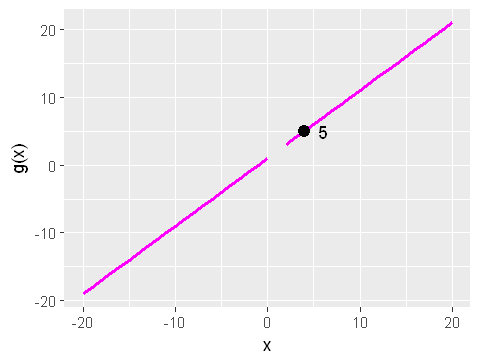

In [23]:
df_point = data.frame(x = 4, y = g(4))

## Make the plot
ggplot(df25, aes(x,g)) + 
    geom_line(color = 'magenta', size = 1) +
    geom_point(data = df_point, aes(x,y), size = 3) +
    annotate("text", x = df_point$x + 2, y = df_point$y, 
             label = round(df_point$y, 8)) +
    xlab('x') + ylab('g(x)')

### Factorization
OK, now let's try to find the limit of ***g(x)*** as ***x*** approaches **1**.

We know from the function definition that the function is not defined at x = 1, but we're not trying to find the *value* of ***g(x)*** when x *equals* 1; we're trying to find the *limit* of ***g(x)*** as x *approaches* 1.

The direct substitution approach won't work in this case:

\begin{equation}g(1) = \frac{1^{2} - 1}{1 - 1}\end{equation}

Simplifies to:

\begin{equation}g(1) = \frac{0}{0}\end{equation}

Anything divided by 0 is undefined; so all we've done is to confirm that the function is not defined at this point. You might be tempted to assume that this means the limit does not exist, but <sup>0</sup>/<sub>0</sub> is a special case; it's what's known as the *indeterminate form*; and there may be a way to solve this problem another way.

We can factor the *x<sup>2</sup> - 1* numerator in the definition of ***g*** as as *(x - 1)(x + 1)*, so the limit equation can we rewritten like this:

\begin{equation}\lim_{x \to a} g(x) = \frac{(x-1)(x+1)}{x - 1}\end{equation}

The ***x - 1*** in the numerator and the ***x - 1*** in the denominator cancel each other out:

\begin{equation}\lim_{x \to a} g(x)= x+1\end{equation}

So we can now use substitution for *x = 1* to calculate the limit as *1 + 1*:

\begin{equation}\lim_{x \to 1} g(x) = 2\end{equation}

Let's see what that looks like:

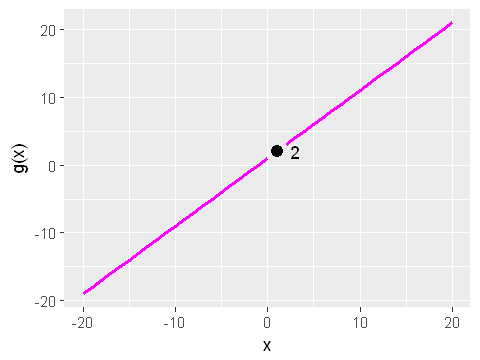

In [24]:
df_point = data.frame(x = 1, y = 2)

## Make the plot
ggplot(df25, aes(x,g)) + 
    geom_line(color = 'magenta', size = 1) +
    geom_point(data = df_point, aes(x,y), size = 3) +
    annotate("text", x = df_point$x + 2, y = df_point$y, 
             label = round(df_point$y, 8)) +
    xlab('x') + ylab('g(x)')

### Rationalization
Let's look at another function:

\begin{equation}h(x) = \frac{\sqrt{x} - 2}{x - 4}, x \ne 4 \text{ and } x \ge 0\end{equation}

Run the following cell to plot this function as a graph:

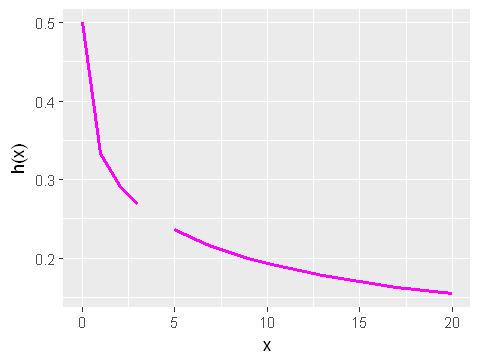

In [25]:
h = function(x){
    ## Use ifelse to vectorize the if statement
    ifelse((x >= 0 & x != 4), (sqrt(x) - 2)/(x - 4), NA)
}

## Construct the data frame.
df26 = data.frame(x = seq(0,20))
df26$h = h(df26$x) ## Call g(x) with the vector df26$x

## Make the plot
ggplot(df26, aes(x,h)) + geom_line(color = 'magenta', size = 1) +
       xlab('x') + ylab('h(x)')

To find the limit of ***h(x)*** as ***x*** approaches **4**, we can't use the direct substitution method because the function is not defined at that point. However, we can take an alternative approach by multiplying both the numerator and denominator in the function by the *conjugate* of the numerator to *rationalize* the square root term (a conjugate is a binomial formed by reversing the sign of the second term of a binomial):

\begin{equation}\lim_{x \to a}h(x) = \frac{\sqrt{x} - 2}{x - 4}\cdot\frac{\sqrt{x} + 2}{\sqrt{x} + 2}\end{equation}

This simplifies to:

\begin{equation}\lim_{x \to a}h(x) = \frac{(\sqrt{x})^{2} - 2^{2}}{(x - 4)({\sqrt{x} + 2})}\end{equation}

The &radic;x<sup>2</sup> is x, and 2<sup>2</sup> is 4, so we can simplify the numerator as follows:

\begin{equation}\lim_{x \to a}h(x) = \frac{x - 4}{(x - 4)({\sqrt{x} + 2})}\end{equation}

Now we can cancel out the *x - 4* in both the numerator and denominator:

\begin{equation}\lim_{x \to a}h(x) = \frac{1}{{\sqrt{x} + 2}}\end{equation}

So for x approaching 4, this is:

\begin{equation}\lim_{x \to 4}h(x) = \frac{1}{{\sqrt{4} + 2}}\end{equation}

This simplifies to:

\begin{equation}\lim_{x \to 4}h(x) = \frac{1}{2 + 2}\end{equation}

Which is of course:

\begin{equation}\lim_{x \to 4}h(x) = \frac{1}{4}\end{equation}

So the limit of ***h(x)*** as ***x*** approaches **4** is <sup>1</sup>/<sub>4</sub> or 0.25.

Let's calculate and plot this with R:

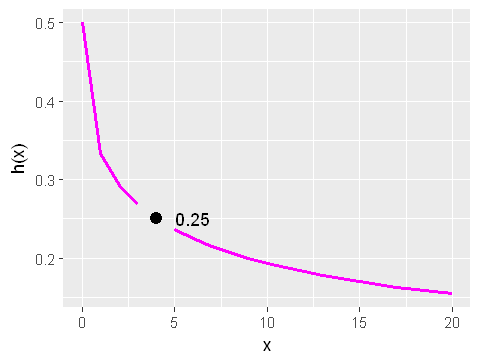

In [26]:
df_point = data.frame(x = 4, y = 1 / ((sqrt(4)) + 2))

## Make the plot
ggplot(df26, aes(x,h)) + geom_line(color = 'magenta', size = 1) +
      geom_point(data = df_point, aes(x,y), size = 3) +
      annotate("text", x = df_point$x + 2, y = df_point$y, 
             label = round(df_point$y, 8)) +
       xlab('x') + ylab('h(x)')

## Rules for Limit Operations
When you are working with functions and limits, you may want to combine limits using arithmetic operations. There are some intuitive rules for doing this.

Let's define two simple functions, ***j***:

\begin{equation}j(x) = 2x - 2\end{equation}

and ***l***:

\begin{equation}l(x) = -2x + 4\end{equation}


Run the cell below to plot these functions:

ERROR: Error in xlab("x") + ylab("y"): non-numeric argument to binary operator


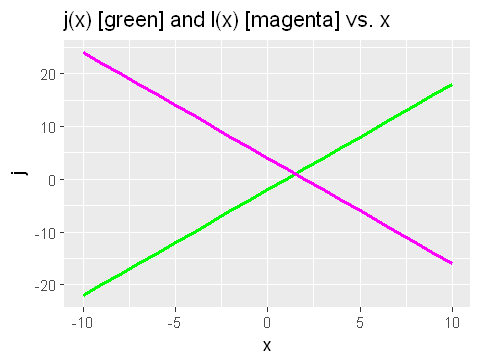

In [27]:
j = function(x) 2*x - 2
l = function(x) -2*x + 4

df27 = data.frame(x = seq(-10,10))
df27$j = j(df27$x)
df28 = data.frame(x = df27$x, l = l(df27$x))

## Make the plot
ggplot() + 
       geom_line(data = df27, aes(x,j), color = 'green', size = 1) +
       geom_line(data = df28, aes(x,l), color = 'magenta', size = 1) +
       ggtitle('j(x) [green] and l(x) [magenta] vs. x')
       xlab('x') + ylab('y')

### Addition of Limits

First, let's look at the rule for addition:

\begin{equation}\lim_{x \to a} (j(x) + l(x)) = \lim_{x \to a} j(x) + \lim_{x \to a} l(x)\end{equation}

What we're saying here, is that the limit of *j(x)* + *l(x)* as *x* approaches *a*, is the same as the limit of *j(x)* as *x* approaches *a* added to the limit of *l(x)* as *x* approaches *a*.

Looking at the graph for our functions ***j*** and ***l***, let's apply this rule to an *a* value of **8**.

By visually inspecting the graph, you can see that as *x* approaches 8 from either direction, *j(x)* gets closer to 14, so:

\begin{equation}\lim_{x \to 8} j(x) = 14\end{equation}

Similarly, as *x* approaches 8 from either direction, *l(x)* gets closer to -12, so:

\begin{equation}\lim_{x \to 8} l(x) = -12\end{equation}

So based on the addition rule:

\begin{equation}\lim_{x \to 8} (j(x) + l(x)) = 14 + -12 = 2\end{equation}

### Subtraction of Limits
Here's the rule for subtraction:

\begin{equation}\lim_{x \to a} (j(x) - l(x)) = \lim_{x \to a} j(x) - \lim_{x \to a} l(x)\end{equation}

As you've probably noticed, this is consistent with the rule of addition. Based on an *a* value of 8 (and the limits we identified for this *a* value above), we can apply this rule like this:

\begin{equation}\lim_{x \to 8} (j(x) - l(x)) = 14 - -12 = 26\end{equation}

### Multiplication of Limits
Here's the rule for multiplication:

\begin{equation}\lim_{x \to a} (j(x) \cdot l(x)) = \lim_{x \to a} j(x) \cdot \lim_{x \to a} l(x)\end{equation}

Again, you can apply this to the limits as x approached an *a* value of 8 we identified previously:

\begin{equation}\lim_{x \to 8} (j(x) \cdot l(x)) = 14 \cdot -12 = -168\end{equation}

This rule also applies to multipying a limit by a constant:

\begin{equation}\lim_{x \to a} c \cdot l(x) = c \cdot \lim_{x \to a} l(x)\end{equation}

So for an *a* value of 8 and a constant *c* value of 3, this equates to:

\begin{equation}\lim_{x \to 8} 3 \cdot l(x) = 3 \cdot -12 = -36\end{equation}


### Division of Limits
For division, assuming the limit of *l(x)* when x is approaching *a* is not 0:

\begin{equation}\lim_{x \to a} \frac{j(x)}{l(x)} = \frac{\lim_{x \to a} j(x)}{\lim_{x \to a} l(x)}\end{equation}

So, based on our limits for *j(x)* and *l(x*) when *x* approaches 8:

\begin{equation}\lim_{x \to 8} \frac{j(x)}{l(x)} = \frac{14}{-12}= \frac{7}{-6}\end{equation}

### Limit Exponentials and Roots

Assuming *n* is an integer:

\begin{equation}\lim_{x \to a} (j(x))^{n} = \Big(\lim_{x \to a} j(x)\Big)^{n}\end{equation}

So for example:

\begin{equation}\lim_{x \to 8} (j(x))^{2} = \Big(\lim_{x \to 8} j(x)\Big)^{2} = 14^{2} = 196\end{equation}

For roots, again assuming *n* is an integer:

\begin{equation}\lim_{x \to a} \sqrt[n]{j(x)} = \sqrt[n]{\lim_{x \to a} j(x)}\end{equation}

So:

\begin{equation}\lim_{x \to 8} \sqrt[2]{j(x)} = \sqrt[2]{\lim_{x \to 8} j(x)} = \sqrt[2]{14} \approx 3.74\end{equation}
